<a href="https://colab.research.google.com/github/raqueeb/TensorFlow2/blob/master/classification_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## লাইফস্টাইল প্রোডাক্টের ক্লাসিফিকেশন
###  ফ্যাশন MNIST ডেটাসেট

(ছবিগুলো আপডেট হবে বাংলায় - ধন্যবাদ উডাসিটি, কোর্সেরা, ডিপমাইন্ড, টেন্সর-ফ্লো সাইট)

আমরা যে এক্সসাইজটা করলাম সেটা কিন্তু ডিপ লার্নিং এর কোন অংশ নয়, তবে সাধারণ একটা মেশিন লার্নিং সমস্যাকে ডিপ লার্নিং ফ্রেমওয়ার্কে সমাধান করার চেষ্টা করেছি মাত্র। ডিপ লার্নিং ফ্রেমওয়ার্কের কাজ আমরা দেখব অন্যান্য ক্ষেত্রে। এর আগের সমস্যাটা ছিল রিগ্রেশন, যেখানে আমরা কন্টিনিউয়াস ভেরিয়েবলের ইনপুট এর সাপেক্ষে আরেকটা কন্টিনিউয়াস আউটপুট পেয়েছি। ১৫ সেকেন্ড ডাকের সংখ্যার সাথে তাপমাত্রা। দুটোই কন্টিনিয়াস ভেরিয়েবল। এখন আমরা একটা ক্লাসিফিকেশন প্রবলেম দেখব। তবে সেটা সাধারণ ক্লাসিফিকেশন নয়, বরং ইমেজ সংক্রান্ত। ডিপ লার্নিং এর হ্যালো ওয়ার্ল্ড, মানে যে এক্সাইজ টা দিয়ে সবাই শুরু করে সেটাকে আমরা বলি MNIST ডাটা সেট। হাতে লেখা ইংরেজি অক্ষর কে ঠিকমতো চেনার জন্য এই এক্সেসাইজ টা শুরুর জন্য সবারই পছন্দের। কম্পিউটার ভিশনের সবচেয়ে প্রথম এক্সাইজ বলে সবাই চেনে তাকে।

আমাদের এই এক্সারসাইজটা ব্যবহার ব্যবহার করছে কেরাস [tf.keras](https://www.tensorflow.org/guide/keras), একটা হাই-লেভেল এপিআই যা টেন্সর-ফ্লোএর কমপ্লেক্সিটি লুকিয়ে রাখে। 

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  # শুধুমাত্র কোলাবে চেষ্টা করবো টেন্সর-ফ্লো ২.০ এর জন্য
  %tensorflow_version 2.x
except Exception:
  pass

In [77]:
# টেন্সর-ফ্লো এবং কেরাসকে ইমপোর্ট করছি
import tensorflow as tf
from tensorflow import keras

# কিছু হেলপার লাইব্রেরি
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-rc2


## ফ্যাশন MNIST ডেটাসেট ইমপোর্ট করছি

৭০,০০০ গ্রে-স্কেল স্যাম্পল আছে আমাদের [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)এ। এখন আমরা পুরোদস্তুর লাইফ স্টাইল ব্যবসায়ী হয়ে গেছি। আমাদের কাছে হাজারো হাজারো কাপড়চোপড়, টি শার্ট, জুতা স্নিকার্স, আরো বেশ কিছু জিনিস চলে এসেছে শোরুমে দেবার জন্য। কিন্তু আপনি নাছোড়বান্দা, আপনি বললেন ক্যাটালগিং ছাড়া এগুলো শোরুমে উঠানো টা ঠিক হবে না। আর এই ক্যাটালগিং আমরা হাতে কলমে করতে চাইনা। এক একটা জিনিস ধরবো ক্যামেরার সামনে, সে নিজে থেকেই ঠিকমতো ক্লাসিফাই করবে কোনটা কি জিনিস। মেশিনে ঠিকমতো আইডেন্টিফাই করতে পারলে আমাদের সমস্যা মিটে যাবে। আপনার দরকার একটা ডিপ লার্নিং মডেল। আপনার উর্দ্ধতন কর্মকর্তা বললেন, আমি ব্যাপারটা ঠিক বুঝি না, আমাকে কি একটা ডেমো দেখানো যাবে?


** ২৮ X ২৮ পিক্সেল = ৭৬৮ বাইট **

** ১০টা ক্যাটেগরি **
<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>
আর সে কারণেই আপনি দ্বারস্থ হলেন ফ্যাশন MNIST ডাটা সেটের কাছে। ব্যাপারটা সাধারণ MNIST এর সকল কোড সাপোর্ট করে, তবে ফ্যাশন MNIST বেশকিছু কমপ্লেক্স। এখানে প্রায় 70 হাজার স্যাম্পল আছে, তার মধ্যে দশ হাজার ইমেজ কে ব্যবহার করব আমাদের নেটওয়ার্ক কতটুকু শিখেছে ইমেজকে ঠিকমতো ক্লাসিফাই করার জন্য। এই ইমেজ গুলোর রেজুলেশন 28/8 800 পিক্সেল। ছবিতে দেখুন শুরুতেই টি-শার্ট টপ, মাঝখানে স্যান্ডেল, শেষের দিকে আঙ্কেল বুটস। নিচের ছবিতে দেখুন যে দশটা আইটেম আছে আমাদের এই ডাটা সেটে। এর পাশাপাশি আমরা সংখ্যায় লেভেল দিয়েছি 0 থেকে 9 পর্যন্ত। আপনি বুঝে গেছেন যে আমাদের ডিপ লার্নিং নেটওয়ার্ককে ট্রেইন করার জন্য ইমেজ আছে 60000। 

যেহেতু প্রতিটা ইমেজ 2828 গ্রেস্কেল ইমেজ, এর সাইজ হচ্ছে 764 বাইট (দুটোকে গুন দিলে যা হয়)। তার মানে হচ্ছে এর পিক্সএল ইনটেনসিটি শূন্য থেকে 255 পর্যন্ত। ইনপুট হিসেবে থাকবে এই 28/8 পিকচারের ছবি, মাঝখানে থাকবে আমাদের দীপ নিউড়াল নেটওয়ার্ক। এখন আমাদের নিউরাল নেটওয়ার্ক ইনপুট হিসেবে 764 বাইট কে নেবে, মাঝখানে সে জাদুর ছড়ি ঘুরিয়ে শেষে ক্লাসিফাইড করে দেবে একেকটা ইমেজ যা আসলে যেকোন দশটা আইটেমের একটা আইটেম হবে।

## ছবিতে কি কি আছে?

ভালো করে নিচের ছবিটা দেখি। ছবিতে আলাদা করতে পারবেন এলিমেন্টগুলোকে?

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/start-page/cat1.png"
         alt="Fashion MNIST sprite"  width="600">

## ডেটাসেট আছে tf.keras.datasets এ fashion_mnist হিসেবে 

আমরা লোড ডাটাকে কল করলে নিয়ে আসবে দুই সেটের দুটো লিস্ট। ট্রেনিং এবং টেস্ট সেট। তার ভেতরে একটা কাপড় চোপড়ের ছবি, আরেকটা তার লেবেল মানে কোনটা কি?

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
# আমরা আমরা এভাবেও চেষ্টা করতে পারি

# dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
# train_dataset, test_dataset = dataset['train'], dataset['test']

# ডেটা ভাগ করে ফেলি
# num_train_examples = metadata.splits['train'].num_examples
# num_test_examples = metadata.splits['test'].num_examples
# print("Number of training examples: {}".format(num_train_examples))
# print("Number of test examples:     {}".format(num_test_examples))

## ডেটাসেট লোড করে কি পাবো?

ডেটাসেট লোড করতে গিয়ে চারটা নামপাই অ্যারে পাচ্ছি। 


* এখানে `train_images` এবং `train_labels` অ্যারে দুটো আমাদের ট্রেনিং সেট — এগুলোকে আমরা ব্যবহার করবো মডেলকে ট্রেনিং করানোর জন্য। 
* মডেলকে টেস্ট করবো টেস্ট সেট দিয়ে। এই দুটো অ্যারে হিসেবে `test_images`, এবং `test_labels`।

আমাদের ছবিগুলো ২৮x২৮ নামপাই অ্যারে যার পিক্সেল ভ্যালু ০ থেকে ২৫৫ এর মধ্যে। এখানে লেবেলগুলো ইন্টেজারের অ্যারে, ০ থেকে ৯ পর্যন্ত। তার করেসপন্ডিং ছবিগুলোর নাম দেখুন এখানে। 

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

প্রতিটা ছবি কিন্তু ম্যাপিং করা আছে একেকটা লেবেলে। একটা ক্লাস নাম দিয়ে রাখি পরে ব্যবহার করতে। প্লটিং এর সময়ে লাগবে। 

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## এক্সপ্লোরেটরি ডেটা অ্যানালাইসিস

ডেটাগুলোকে একটু নেড়েচেড়ে দেখি। এটা একটা ভালো প্র্যাকটিস - ডেটাকে চিনতে। এখানে দেখছি ৬০,০০০ ছবি, ট্রেনিং সেটে। ২৮x২৮ পিক্সেল, ০ থেকে ৯ লেবেল। বাকি ১০,০০০ টেস্ট ছবি, পরীক্ষা করার জন্য। 

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/start-page/cat2.png"
         alt="Fashion MNIST sprite"  width="600">

In [81]:
train_images.shape

(60000, 28, 28)

৬০,০০০ লেবেলও আছে সঙ্গে।

In [82]:
len(train_labels)

60000

০ থেকে ৯ লেবেল সব ইন্টেজার ভ্যালু। 

In [83]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

১০,০০০ টেস্ট ছবি। ২৮x২৮ পিক্সেল আছে এখানেও। 

In [84]:
test_images.shape

(10000, 28, 28)

আছে ১০,০০০ লেবেলও। 

In [85]:
len(test_labels)

10000

## ট্রেনিং ছবি এবং তার লেবেল

আচ্ছা, এর ভেতরের ডেটাগুলো কেমন দেখতে? আমরা একটা ট্রেনিং ছবি দেখি।  তার সাথে তার লেবেল। 

In [86]:
print(train_labels[0])

print(train_images[0])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

## ডেটার প্রি-প্রসেসিং 

মনে আছে ডেটা নরমালাইজ করার কথা? যখন ডেটা বেশি ডিস্ট্রিবিউটেড থাকে তখন সেটা কাজ করানো সমস্যা হয়। আমরা যদি প্রথম ছবিটা দেখি, তাহলে বুঝবো সেটার পিক্সেল রেঞ্জ ০ থেকে ২৫৫ পর্যন্ত। 

ছবিটা দেখি কালারবার সহ। 

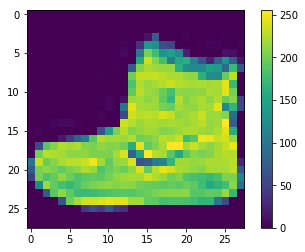

In [87]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

আমাদের ডাটাগুলোকে এমনভাবে প্রি-প্রসেস করতে হবে যাতে সেটা ঠিকমতো কাজ করতে পারে। যেহেতু আমাদের ইনপুট ভ্যারিয়েবলব্গুলো গ্রেস্কেল মানে ০ থেকে ২৫৫ পর্যন্ত রেঞ্জ, সে কারণে আমরা সেটাকে ০ থেকে ১ এর মধ্যে নিয়ে আসব। আমাদের ট্রেনিং এবং টেস্ট সেট দুটোকেই এই নরমালাইজেশন এর মধ্যে নিয়ে আসতে হবে। এটা করার জন্য আমাদেরকে প্রতিটা ইমেজকে ২৫৫ দিয়ে ভাগ করতে হবে। তাহলে সেটা ০ থেকে ১ এর মধ্যে চলে আসবে।

পাইথনে সুবিধা হচ্ছে একটা লিস্টকে নর্মালাইজ করতে লুপিং করতে হবে না। 

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
# আমরা এভাবেও করতে পারি, একটা ফাংশন ডিক্লেয়ার করে 

# def normalize(images, labels):
#  images = tf.cast(images, tf.float32)
#  images /= 255
#  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
# train_dataset =  train_dataset.map(normalize)
# test_dataset  =  test_dataset.map(normalize)

আমরা দেখতে চাচ্ছি ডেটাগুলো ঠিকমতো ফরম্যাটে আছে কিনা? যেহেতু আমরা এই ডাটাগুলোকে ট্রেনিংয়ে ব্যবহার করবো, সেকারণে প্রথম ২৫টা ছবিকে ডিসপ্লে করি। যেহেতু আমরা আগেই ক্লাস ডিক্লেয়ার করেছিলাম সেকারণে নিচে সেটার নাম দেখা যাবে। 

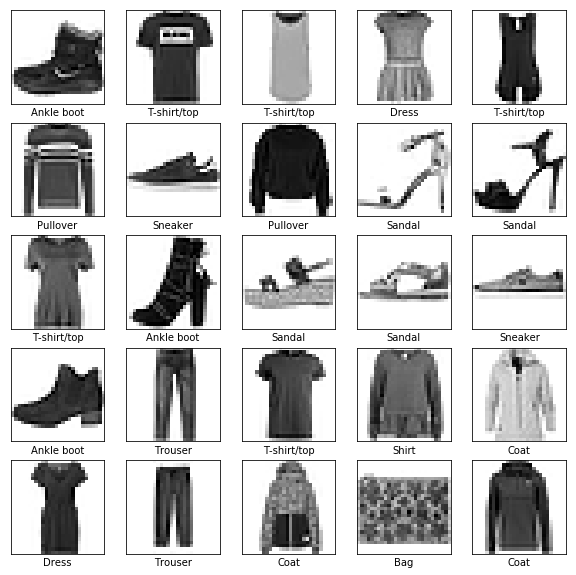

In [90]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## মডেলকে বিল্ড করি 

আগেও দেখেছি একটা নিউরাল নেটওয়ার্ক তৈরি করতে প্রথমে মডেলের লেয়ার বানাতে হবে। এরপর আসবে কম্পাইলিং। মডেলের কাজ হচ্ছে ইনপুট থেকে ২৮ x ২৮ পিক্সেল মানে ৭৮৪ পিক্সেল থেকে এই নিউরাল নেটওয়ার্কের লেয়ারগুলো শার্ট/ব্যাগ এর মতো আইটেমগুলোকে ক্লাসিফাই করবো। 

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/start-page/cat3.png"
         alt="Fashion MNIST sprite"  width="600">

### লেয়ারগুলোকে সেট করি

একটা নিউরাল নেটওয়ার্কের বেসিক বিল্ডিং ব্লক হচ্ছে তার লেয়ার। এই লেয়ারগুলো বিভিন্ন ফিচার এক্সট্রাক্ট করে রিপ্রেজেন্টেশন এর মাধ্যমে। ইনপুট ডাটা থেকে। যেহেতু একেকটার লেয়ার আরেকটা লেয়ারের সাথে সিকুয়েন্সিয়াল, সে কারণেই ডেন্স `tf.keras.layers.Dense` ব্যবহার করছি। এর ভেতরের ইন্টারনাল প্যারামিটারগুলো নিজে থেকেই এডজাস্ট হয় মানে শেখে এই ট্রেনিং এর সময়। 

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

আমাদের এই নেটওয়ার্কটা তিনটা লেয়ারের, ছবি দেখুন। 

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/start-page/cat5.1.png"
         alt="Fashion MNIST sprite"  width="600">

* **ইনপুট লেয়ার** - প্রথম লেয়ারটার কাজ বেশ মজার। এর কাজ হচ্ছে ইনপুটকে ফ্ল্যাট করে দেয়া - `tf.keras.layers.Flatten`। আমাদের ইনপুট হিসেবে যে ইমেজ আছে সেটা কিন্তু একটা ২ ডাইমেনশনের অ্যারে মানে ২৮ x ২৮ পিক্সেল। বেসিক মডেলগুলোতে ডাইমেনশনের অ্যারের লাইনগুলোকে একসাথে প্রসেস করা কঠিন, তাই সেগুলোকে আমরা পাশাপাশি খুলে এক লাইনে দাঁড় করাবো। এই ২৮ x ২৮ পিক্সেলকে এক লাইনে দাঁড় করালে ৭৮৪ পিক্সেল হয়। এই লেয়ারের কোন লার্নিং প্যারামিটার নেই, তার কাজ হচ্ছে এটাকে রিফর্মেট মানে নতুন ফরম্যাটে ট্রান্সফরম করে দেয়।

* **"হিডেন লেয়ার"** — এটা 'ডেন্স' লেয়ার, একটার সাথে আরেকটা 'ডেন্সলি কানেক্টেড' মানে `tf.keras.layers.Dense`। ইনপুট লেয়ারের পর থেকে আমরা হিডেন লেয়ার বলতে পারি। এই লেয়ারটাকে আমরা কনফিগার করেছি ১২৮টা নিউরন দিয়ে। আরো কম বেশি করতে পারতাম। প্রতিটা নিউরন যাকে আমরা নোড বলছি সেটা কিন্তু ৭৮৪টা নোডকে কানেক্ট করছে আগের লেয়ার থেকে নতুন লেয়ারে। ইনপুট এর ওয়েট এর উপর ভিত্তি করে এই হিডেন প্যারামিটারগুলো শেখে ট্রেনিং এর সময়। তবে তাদের আউটপুটের যে সিঙ্গেল ভ্যালু সেটাকে সে পাঠায় পরবর্তী লেয়ারে। এখানে আমরা ইচ্ছা করলে আরো কয়েকটা লেয়ার দিতে পারতাম, তবে শেখার জন্য আমরা এটাকে একটু সিম্প্লিস্টিক রাখছি। আমাদের অ্যাক্টিভেশন ফাংশন হিসেবে এখানে ব্যবহার করেছি রেলু, যা আসলে নন লিনিয়ার ফাংশনকে ভালোভাবে সামনে এগিয়ে দিতে পারে।

* আমাদের এখানে activation='relu' এর কাজ হচ্ছে "যদি X>0 তাহলে রিটার্ন X, নাহলে রিটার্ন 0"। এর মানে হচ্ছে এই অ্যাক্টিভেশন ফাংশন লেয়ারে X শূন্য এর বড়ো হলে সামনের লেয়ারে X এর ভ্যালু পাঠাবে। 

* **আউটপুট লেয়ার** `tf.keras.layers.Dense` — এর কনফিগারেশন আগের মতো। ডেন্স। আউটপুট লেয়ারে আপনাদের অবশ্যই মনে আছে আমাদেরকে ক্লাসিফাই করতে হবে দশটা অবজেক্ট। ১০ ধরনের কাপড়, চোপড়, জুতা এগুলোকে যখন ক্লাসিফাই করব তখন অ্যাক্টিভেশন লেয়ার হিসাবে ব্যবহার করব 'সফটম্যাক্স'। 'সফটম্যাক্স' এর কাজ হচ্ছে তাকে যদি দশটা ভ্যালু দেয়া হয় সে সবার ম্যাক্সিমাম ভ্যালু, সবচেয়ে বড় ভ্যালুটা পিক করবে পরের লেয়ারে পাঠাতে। এই ফাংশন আমাদের অনেক কোডিং বাঁচায়। 

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/start-page/cat6.png"
         alt="Fashion MNIST sprite"  width="600">
* প্রথম লেয়ারে ইনপুট ছিল ৭৮৪ বাইট, এরপরের লেয়ার থেকে শেষ লেয়ারে আমাদের ইনপুট হবে ১২৮ নোড থেকে। প্রতিটা নোডের ওয়েট ইনপুট এর সাথে যুক্ত হয়ে সেটা একটা শেখানো প্যারামিটার হিসেবে দাঁড়াবে। আমাদের আউটপুট ভ্যালু কিন্তু ০ থেকে ১ এর মধ্যে, আমরা যেটাকে বলি প্রবাবিলিটি ডিস্ট্রিবিউশন যেটা আমাদেরকে ওই ছবিটা কে কোন ক্লাসে পড়বে সেটা দেখাবে। এর মধ্যে সবচেয়ে বড়োটা পিক করবে সফটম্যাক্স। ছবি দেখুন, এই দশটা নোটের সবগুলোর ভ্যালু যোগ করলে এক হবে।

### মডেলকে কম্পাইল করা

ট্রেনিং করানোর আগে আমাদেরকে কিছু সেটিং বুঝতে হবে। এগুলোকে আমরা যোগ করবো মডেল কম্পাইলিং স্টেজে। 

* *লস ফাংশন* — আগেও আলাপ করেছিলাম, তবে মডেলকে ঠিক জায়গায় মানে ঠিক অ্যাক্যুরেসিতে পৌঁছাতে হলে এই ফাংশন দরকার। আমাদের এখানে আউটপুট ১০ টা ক্যাটেগরীতে একটা আরেকটার সাথে মিউচুয়ালি এক্সক্লুসিভ (যেখানে একেকটা স্যাম্পল একদম একটা ক্লাসেই থাকবে), সেকারণে ব্যবহার করছি 'sparse_categorical_crossentropy' ব্যবহার করছি লস হিসেবে। 

* *অপটিমাইজার* — লস ক্যালকুলেট করে সেটার কারেকশন/আপডেট পাঠানোই এর কাজ। 

* *মেট্রিকস* — আমরা যখন ট্রেনিং এবং টেস্ট একসাথে মনিটর করবো, তখন অ্যাক্যুরেসির দরকার পড়বে। আমাদের এখানে যখন কিছু ছবি ঠিকমতো ক্লাসিফাই হয়েছে, তখন অ্যাক্যুরেসিটা কার্যকরী। 

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## মডেলকে ট্রেনিং করাই

আমাদের এই নিউরাল নেটওয়ার্ককে ট্রেনিং করাতে সামনের কয়েকটা স্টেপ দরকার পড়বে;

১. শুরতেই ডেটাকে ফিড করতে হবে মডেলকে। আমাদের এখানে ট্রেনিং ডেটা আছে `train_images` এবং `train_labels` অ্যারেগুলোতে।
২. মডেল শেখে তার ছবি আর লেবেলের মধ্যে সম্পর্ক থেকে। 
৩. এখন আমাদের মডেল টেস্ট করার পালা। `train_images` থেকে প্রেডিকশন করাবো? ভুলেও না। তাহলে পরীক্ষায় প্রশ্ন ফাঁস হয়ে যাবে। বরং আমরা ব্যবহার করবো আনকোরা টেস্ট সেট থেকে যাদের আলাদা করে রেখেছিলাম। আমরা ব্যবহার করবো `test_images` অ্যারে। আমাদেরকে ভেরিফাই করতে হবে `test_images` অ্যারে ম্যাচ করে কিনা `test_labels`কে। 
৪. `epochs=10` মানে পুরো ট্রেনিংসেটের ওপর ১০ বার পুরো আইটারেশন চালাবে, মানে সর্বমোট  ১০ * ৬০০০০ = ৬০০০০০ এক্সাম্পল।

ট্রেনিং শুরুতেই কল করবো `model.fit` মেথডকে — এর কাজ হচ্ছে train_images এবং  train_labels এর ভেতরের সম্পর্ককে শেখা। 

In [93]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4954 - accuracy: 0.8249
Epoch 2/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3703 - accuracy: 0.8669
Epoch 3/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3318 - accuracy: 0.8786
Epoch 4/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3116 - accuracy: 0.8852
Epoch 5/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2936 - accuracy: 0.8919
Epoch 6/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2807 - accuracy: 0.8964
Epoch 7/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2697 - accuracy: 0.8996
Epoch 8/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2592 - accuracy: 0.9027
Epoch 9/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2491 - accuracy: 0.9073
Epoch 10/10
60

এই প্রসেসটা ভালো করে লক্ষ্য করুন। মডেল ট্রেনিং এর পাশাপাশি তার লস এবং অ্যাক্যুরেসির দিকে নজর রাখুন। লস কমার সাথে সাথে অ্যাক্যুরেসি বাড়ছে। এই মডেলের অ্যাক্যুরেসি বেড়ে চলে এসেছে ০.৮৮ মানে ৮৮% ট্রেনিং ডেটার ওপর। 

## অ্যাক্যুরেসিকে টেস্ট ডেটা দিয়ে ইভাল্যুয়েট করানো

ট্রেনিং দেখলাম, এখন দেখতে হবে কেমন কাজ করে টেস্ট ডেটার ওপর?

In [94]:
# model.evaluate(test_images, test_labels)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

টেস্ট ডাটাসেটের ওপর আমরা যখন অ্যাক্যুরেসি টেস্ট করলাম, তখন দেখা গেল এখানে তারা কিছুটা খারাপ করেছে। মানে ট্রেনিং ডাটাসেট থেকে টেস্টডাটা সেটের অ্যাক্যুরেসি কিছুটা খারাপ। এই ট্রেনিং অ্যাক্যুরেসি এবং টেস্টসেটের মধ্যে যে গ্যাপ সেটাকে আমরা বলি 'ওভার ফিটিং'। 'ওভার ফিটিং' হচ্ছে এমন একটা স্ট্যাটাস, যখন মেশিন লার্নিং মডেল নতুন ডাটা, যে ডাটা আগে দেখেনি - সেই ডাটাতে ট্রেনিং ডাটার অ্যাক্যুরেসি থেকে খারাপ করে। 

তবে এই অ্যাক্যুরেসি বাড়ানোর উপায় নিয়ে আলাপ করবো সামনে। 

## এখন প্রেডিকশনের পালা 

যিহেতু আমাদের মডেলের ট্রেনিং হয়ে গেছে, এখন কিছু পরীক্ষা নিরীক্ষার পালা। কিছু ছবি প্রেডিকশন করি এখন। প্রেডিক্ট করি টেস্ট ছবি নিয়ে। 

In [0]:
predictions = model.predict(test_images)

প্রেডিকশন শেষ। আমাদের মডেল প্রতিটা ছবিকে ঠিকমতো লেবেল করেছে কিনা, সেটা দেখা দরকার। শুরুতেই প্রথম প্রেডিকশনটা দেখি।

In [96]:
predictions[0]

array([1.6480678e-08, 4.2616208e-09, 1.0377118e-08, 7.0211599e-13,
       5.6029091e-08, 1.6860482e-03, 2.3413482e-07, 1.7396588e-02,
       8.1135283e-08, 9.8091692e-01], dtype=float32)

ভালো করে লক্ষ্য করুন। আমাদের আউটপুট লেয়ারে যে ১০টা প্রোবাবিলিটি ডিস্ট্রিবিউশন দিচ্ছে, সেখানে সবচেয়ে বেশি সংখ্যাটাই হচ্ছে তার লেবেলের কনফিডেন্স। সবচেয়ে বেশি সংখ্যাটা কি হতে পারে? এখানে একটা ছবি দেখতে পারেন বোঝার সুবিধার জন্য। 

In [97]:
np.argmax(predictions[0])

9

আমাদের মডেল সবচেয়ে বেশি কনফিডেন্ট অ্যাঙ্কেল বুট হিসেবে যার ক্লাস নাম হচ্ছে `class_names[9]`. আমরা যখন চেক করলাম, তখন বোঝা গেল আমাদের ক্লাসিফিকেশন ঠিক আছে।

In [98]:
test_labels[0]

9

এই কোড দেখে ভয় পাবেন না। এই মুহূর্তে আপনার এটা জানতে হবে না। দশটা স্যাম্পলকে আমরা গ্রাফে দেখতে চাচ্ছি ১০টা আলাদা আলাদা ক্লাস প্রেডিকশনে। 

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

ভালো করে লক্ষ্য করুন, ০তম ছবিটা, তার প্রেডিকশনএবং তার প্রেডিকশন অ্যারে। ঠিক প্রেডিকশন লেবেলগুলো নীল (মানে হালকা কালো) আর যেগুলো ঠিক প্রেডিকশন নয়, সেগুলোর লেবেল লাল (হালকা গ্রে)। শেষে ১০০ এর মধ্যে শতাংশ আকারে প্রেডিক্টেড লেবেলের ভ্যালু।

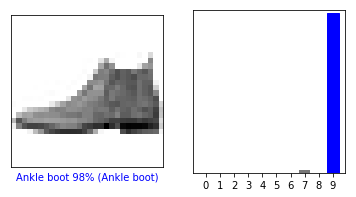

In [100]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

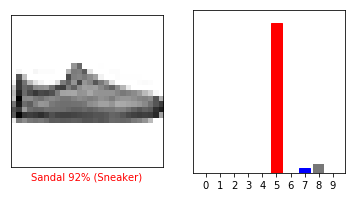

In [101]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

কয়েকটা ছবির পাশাপাশি তার কয়েকটা প্রেডিকশন প্লট করে দেখি। অনেক সময় দেখা যায় - মডেল মাঝে মাঝে ভুল করে যদিও তারা এই ব্যাপারে বেশ 'কনফিডেন্ট' থাকে। 

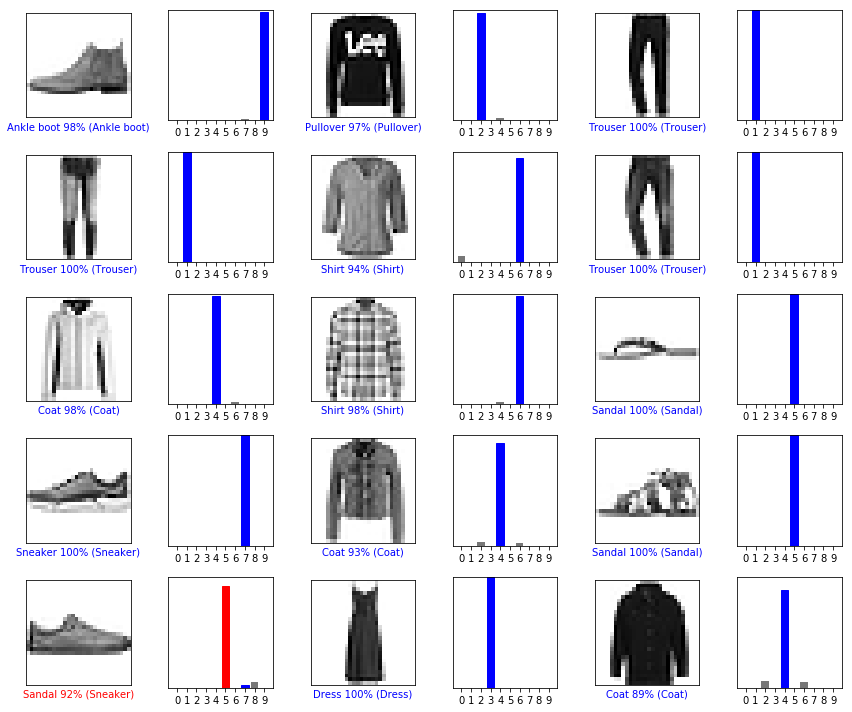

In [102]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

সবশেষে আমাদের এই ট্রেইনড মডেলকে দিয়ে একটা ছবি প্রেডিক্ট করাই। 

In [103]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` মডেল ব্যাচে প্রেডিকশন করার জন্য অপ্টিমাইজ। মানে একটা একটা করে না। এইজন্য ব্যাচে প্রেডিকশন সবসময় সময় বাঁচায়। এখন আমরা যদি একটা ছবিকে ব্যবহার করি সেটাকেও একটা লিস্টে ফেলতে হবে। 

In [104]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


সঠিক লেবেলের জন্য প্রেডিক্ট করি -

In [105]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.0478173e-05 2.1155244e-13 9.7364658e-01 7.1954726e-10 2.1239670e-02
  3.7267651e-14 5.1033213e-03 7.6961068e-14 2.3728886e-09 2.5965160e-14]]


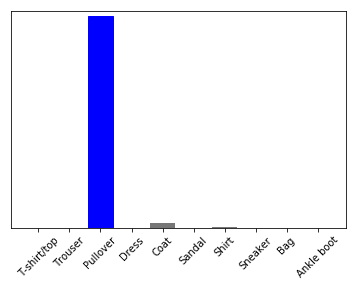

In [106]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` আমাদেরকে একটা লিস্টের লিস্ট দেয়, যেখানে প্রতিটা ছবি ওই ব্যাচে আছে। এখন ওই ব্যাচের একটা ছবির জন্য প্রেডিকশন দেখি। 

In [107]:
np.argmax(predictions_single[0])

2

কি বোঝা গেলো? মডেল ঠিকমতো প্রেডিক্ট করতে পেরেছে বলতে হবে। 

## কেন কলব্যাক? 

মডেলকে ট্রেইন করতে সময় লাগে। বিশেষ করে আমরা যখন বিভিন্ন ইপক সংখ্যা নিয়ে কাজ করি। একেকটা ইপক চালাতে যেরকম কম্পিউটিং রিসোর্স ব্যবহার হয়, সেখানে আমাদেরকে পয়সা গুনতে হয় ক্লাউডএর জন্য। এমন যদি হতো আমরা একটা ট্রেনিং বন্ধ করতে পারতাম যখন আমরা একটা দরকারি অ্যাক্যুরেসি পয়েন্টে পৌঁছে গেছি। এই মুহূর্তে আমাদের প্রতিবারই একটা ইপক সংখ্যা পর্যন্ত যেতে হচ্ছে। ভালো খবর হচ্ছে, আমাদের একটা কলব্যাক ফাংশন আছে যেটা এই ট্রেনিং লুপকে দরকারি অ্যাক্যুরেসি এলেই আপনা আপনি বন্ধ করতে পারে। আমরা আসলে ওই পর্যন্ত পৌঁছাতে চাই ওই লেভেলের অ্যাক্যুরেসি পৌঁছে গেলে ট্রেনিং বন্ধ করে দিতে পারি।

এখন ফ্যাশন MNIST এর মধ্যে কলব্যাক ফিচারটা চালাই। আমাদের 'মডেল.ফিট' ফাংশনটা যখন ট্রেনিং লুপের উপর কাজ করে তখন আমরা লক্ষ্য রাখি সেটার আউটপুটে। পাইথনে কাজটা করা বেশ সোজা। যদিও জিনিসটা ইমপ্লিমেন্ট করা হচ্ছে একটা আলাদা ক্লাস হিসেবে তবে সেটা ইনলাইনে থাকছে আমাদের সেই একই কোডে। ধরা যাক, আমরা চাইছি যখন লস ০.২ এর নিচে থাকতে হবে, তাহলে সেই ট্রেনিংটা এমনিতেই ক্যান্সেল হয়ে যাবে।

দেখি কখন আমাদের ট্রেনিং লুপ থামে!

In [108]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.4813 - accuracy: 0.8281
Epoch 2/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.3587 - accuracy: 0.8682
Epoch 3/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3242 - accuracy: 0.8796
Epoch 4/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2989 - accuracy: 0.8890
Epoch 5/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.2780 - accuracy: 0.8965
Epoch 6/10
59776/60000 [============================>.] - ETA: 0s - loss: 0.2657 - accuracy: 0.9008
Reached 90% accuracy so cancelling training!
60000/60000 [==============================] - 8s 133us/sample - loss: 0.2660 - accuracy: 0.9007


## মডেলের একটা সামারি

কি মনে হচ্ছে? এখানে ৩ লেয়ারের আলাপ দিয়েছে টাইপ, শেপ এবং প্যারামিটার দিয়ে। ট্রেনিং এর জন্য প্যারামিটার সংখ্যা ৪০৭০৫০, মানে ৪ লক্ষ।

In [109]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
